In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd 
from scipy.interpolate import CubicSpline

import os

In [2]:
path =  'Data/RENA.PA/'

files = sorted([i for i in os.listdir(path) if 'trades' in i])

df_list = [pd.read_csv(path + file,usecols=['ts','price','volume'],
                 parse_dates=True,index_col='ts') for file in files]

## 1. Time-homogeneous Poisson process

### 1.1 Two algorithms to simulate a time-homogeneous Poisson process with intensity µ on a time interval [0,T].


Text(0.5, 0, 'Time')

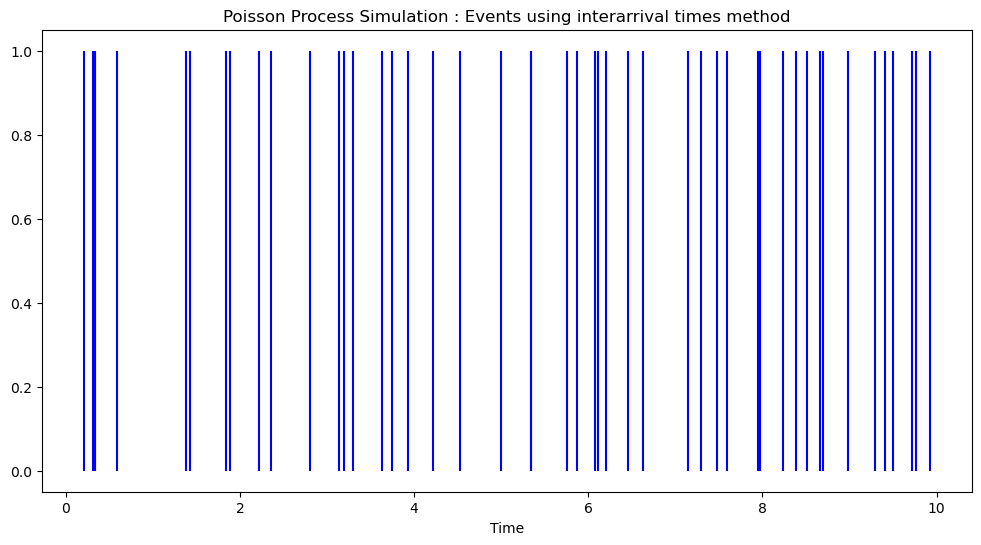

In [3]:
def poisson_process_interarrival(mu, T):
    events = []
    t = 0
    
    while t < T:
        interarrival_time = np.random.exponential(1 / mu)
        t += interarrival_time
        if t < T:
            events.append(t)
    
    return events

mu = 5  # Intensity of the Poisson process
T = 10  # Time interval [0, T]

events_interarrival = poisson_process_interarrival(mu, T)


plt.figure(figsize=(12, 6))
plt.vlines(events_interarrival, 0, 1, color='blue')
plt.title("Poisson Process Simulation : Events using interarrival times method")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

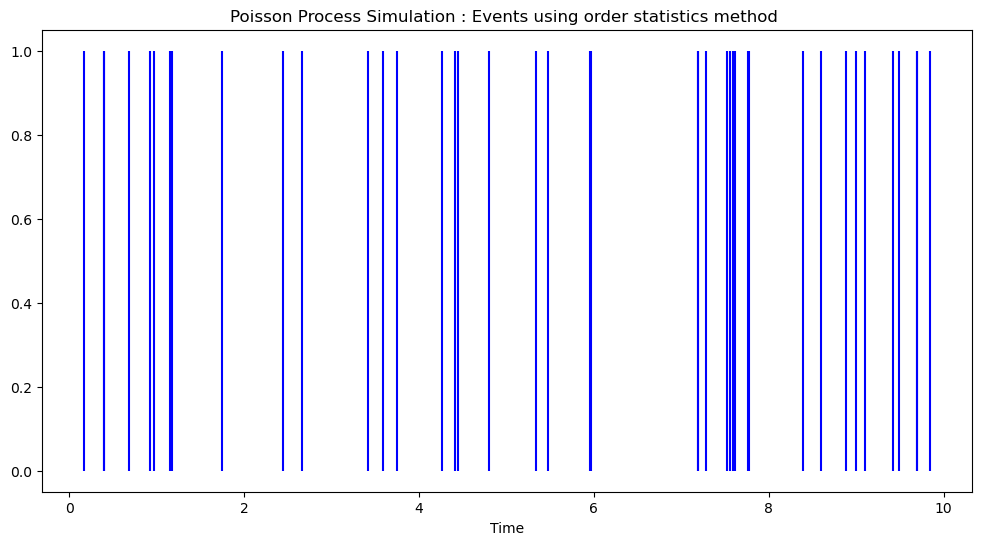

In [4]:
def poisson_process_order_statistics(mu, T):
    events = []
    n = np.random.poisson(mu * T)
    
    for _ in range(n):
        t = np.random.uniform(0, T)
        
        events.append(t)
    
    events.sort()
    return events

mu = 5  # Intensity of the Poisson process
T = 10  # Time interval [0, T]

events = poisson_process_order_statistics(mu, T)

plt.figure(figsize=(12, 6))
plt.vlines(events, 0, 1, color='blue')
plt.title("Poisson Process Simulation : Events using order statistics method ")
plt.xlabel("Time")

### 1.2 A quick sanity check for each algorithm.

Pour effectuer un contrôle rapide de chaque algorithme, on peut vérifier si le nombre moyen d'événements et les temps d'attente moyens sont compatibles avec les propriétés théoriques d'un processus de Poisson. Le nombre moyen d'événements dans l'intervalle de temps [0, T] doit être approximativement $\mu.T$, et le temps d'attente moyen doit être approximativement $\frac{1}{\mu}$

In [5]:
def sanity_check_interarrival(events, mu, T):
    
    n_events = len(events)
    avg_n_events = n_events / T
    print(f"Expected average number of events: {mu}")
    print(f"Actual average number of events: {avg_n_events}")
    
    
    interarrival_times = np.diff([0] + events)
    avg_interarrival_time = np.mean(interarrival_times)
    print(f"Expected average interarrival time: {1 / mu}")
    print(f"Actual average interarrival time: {avg_interarrival_time}")

events_interarrival = poisson_process_interarrival(mu, T)
sanity_check_interarrival(events_interarrival, mu, T)

Expected average number of events: 5
Actual average number of events: 5.3
Expected average interarrival time: 0.2
Actual average interarrival time: 0.18855094420267932


In [6]:
def sanity_check(events, mu, T):
    n_events = len(events)
    avg_n_events = n_events / T
    interarrival_times = np.diff([0] + events)
    avg_interarrival_time = np.mean(interarrival_times)

    print(f"Expected average number of events: {mu}")
    print(f"Actual average number of events: {avg_n_events}")
    print(f"Expected average interarrival time: {1 / mu}")
    print(f"Actual average interarrival time: {avg_interarrival_time}")

events = poisson_process_order_statistics(mu, T)
sanity_check(events, mu, T)

Expected average number of events: 5
Actual average number of events: 3.6
Expected average interarrival time: 0.2
Actual average interarrival time: 0.26733592071570955


### 1.3 Comparaison of the computational cost of each algorithm

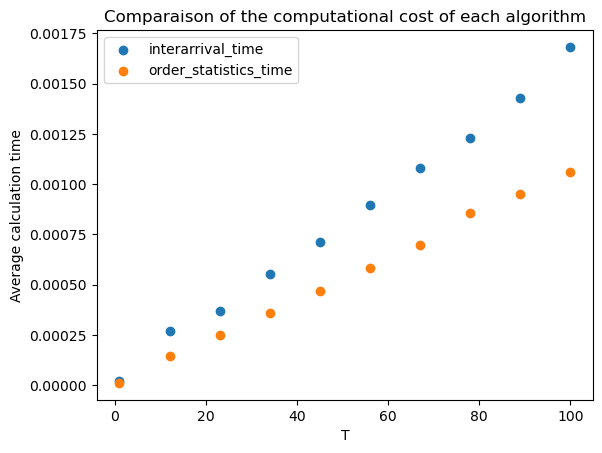

In [7]:
mu = 5  # Intensity of the Poisson process
T_list = np.linspace(1,100,10,dtype=int)  # Time interval [0, T]

n_runs = 100  # Number of runs for each method


interarrival_time = []
order_statistics_time = []


for T in T_list:
    
    # Time the interarrival times method
    interarrival_timer = timeit.Timer(
        'poisson_process_interarrival(mu, T)',
        globals={'poisson_process_interarrival': poisson_process_interarrival, 'mu': mu, 'T': T}
    )
    interarrival_time.append(interarrival_timer.timeit(n_runs) / n_runs)


    # Time the order statistics method

    order_statistics_timer = timeit.Timer(
        'poisson_process_order_statistics(mu, T)',
        globals={'poisson_process_order_statistics': poisson_process_order_statistics, 'mu': mu, 'T': T}
    )
    order_statistics_time.append(order_statistics_timer.timeit(n_runs) / n_runs)


plt.scatter(T_list,interarrival_time,label='interarrival_time')
plt.scatter(T_list,order_statistics_time,label='order_statistics_time')
plt.xlabel('T')
plt.ylabel('Average calculation time')
plt.title('Comparaison of the computational cost of each algorithm')
plt.legend()


La méthode "order statistics" semble plus rapide que la méthode "interarrival time".

### 1.4 optimizing the implementation ( Optional ) 

l'implémentation ci dessous utilise NumPy pour générer une liste de variables aléatoires uniformes. Cette méthode génère efficacement un processus de Poisson sans avoir besoin d'une boucle. L'utilisation des opérations vectorisées de NumPy devrait permettre d'améliorer les performances par rapport à l'implémentation précédente basée sur une boucle.

Text(0.5, 0, 'Time')

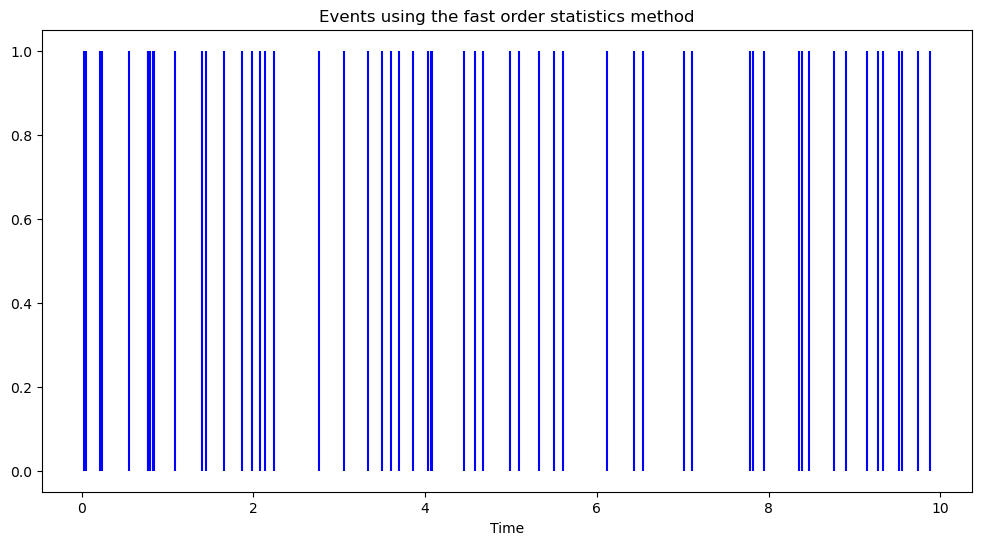

In [8]:
def poisson_process_fast(mu, T):
    n = np.random.poisson(mu * T)
    
    events = np.random.uniform(0, T,n)
    events.sort()
    
    return events

mu = 5  # Intensity of the Poisson process
T = 10  # Time interval [0, T]

events_fast = poisson_process_fast(mu, T)

plt.figure(figsize=(12, 6))
plt.vlines(events_fast, 0, 1, color='blue')
plt.title("Events using the fast order statistics method")
plt.xlabel("Time")

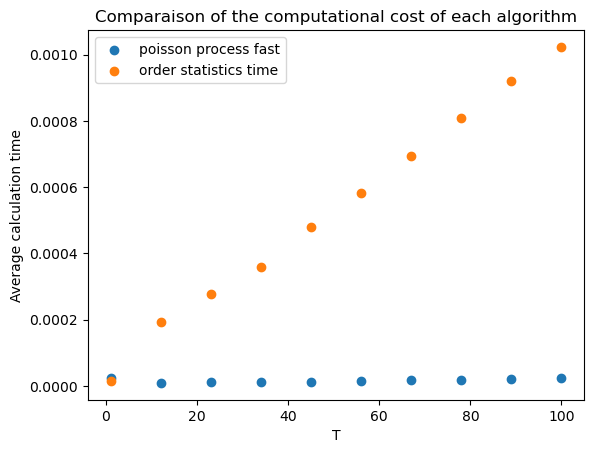

In [9]:
mu = 5  # Intensity of the Poisson process
T_list = np.linspace(1,100,10,dtype=int)  # Time interval [0, T]

n_runs = 100  # Number of runs for each method


time = []
order_statistics_time = []


for T in T_list:
    
    # Time the interarrival times method
    timer = timeit.Timer(
        'poisson_process_interarrival(mu, T)',
        globals={'poisson_process_interarrival': poisson_process_fast, 'mu': mu, 'T': T}
    )
    time.append(timer.timeit(n_runs) / n_runs)


    # Time the order statistics method

    order_statistics_timer = timeit.Timer(
        'poisson_process_order_statistics(mu, T)',
        globals={'poisson_process_order_statistics': poisson_process_order_statistics, 'mu': mu, 'T': T}
    )
    order_statistics_time.append(order_statistics_timer.timeit(n_runs) / n_runs)


plt.scatter(T_list,time,label='poisson process fast')
plt.scatter(T_list,order_statistics_time,label='order statistics time')
plt.xlabel('T')
plt.ylabel('Average calculation time')
plt.title('Comparaison of the computational cost of each algorithm')
plt.legend()

## 2.  A non-homogeneous Poisson process for trades.

### 2.1 A fit for the intensity of one day of trades for one stock (Lab 1 data), e.g., using cubic splines with points every x minutes.

In [10]:
dates = df_list[0].index

# calculate unix datetime
timestamps = (dates - pd.Timestamp("2017-01-02 09:00:00")) // pd.Timedelta('1s')

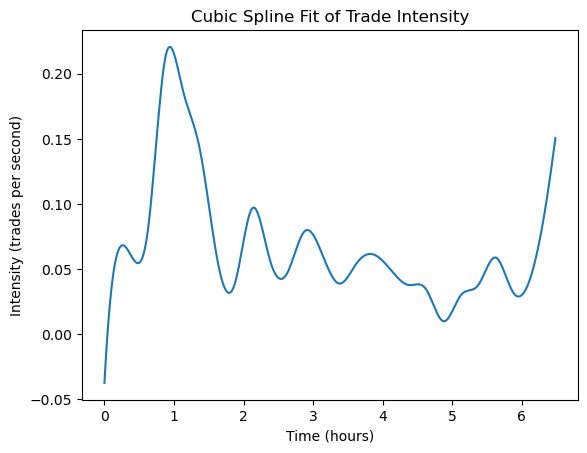

In [11]:
# Bin the data into x-minute intervals
x_minutes = 15
seconds_per_interval = x_minutes * 60
bins = np.arange(0, 23401, seconds_per_interval)
counts, _ = np.histogram(timestamps, bins=bins)

# Normalize the counts to obtain intensities
intensities = counts / seconds_per_interval

# Fit a cubic spline to the intensities
midpoints = (bins[:-1] + bins[1:]) / 2
spl = CubicSpline(midpoints, intensities)

# Plot the results
x_plot = np.arange(0, 23400, 60)  # 1-minute intervals for the plot
y_plot = spl(x_plot)
plt.plot(x_plot / 3600, y_plot)
plt.xlabel("Time (hours)")
plt.ylabel("Intensity (trades per second)")
plt.title("Cubic Spline Fit of Trade Intensity")
plt.show()

### 2.2 Simulate a Poisson process with this fitted intensity. Compare the empirical and simulated distributions of durations with histograms of densities, cumulative distribution functions and quantile plots

In [12]:
# Thinning method for inhomogeneous Poisson process
def inhomogeneous_poisson_process_thinning(intensity_func, T):
    max_intensity = np.max(intensity_func(np.arange(0, T)))
    events = []
    t = 0
    
    while t < T:
        interarrival_time = np.random.exponential(1 / max_intensity)
        t += interarrival_time
        if t < T and np.random.rand() < intensity_func(t) / max_intensity:
            events.append(t)
    
    return events

Text(0.5, 1.0, 'Quantile Plot')

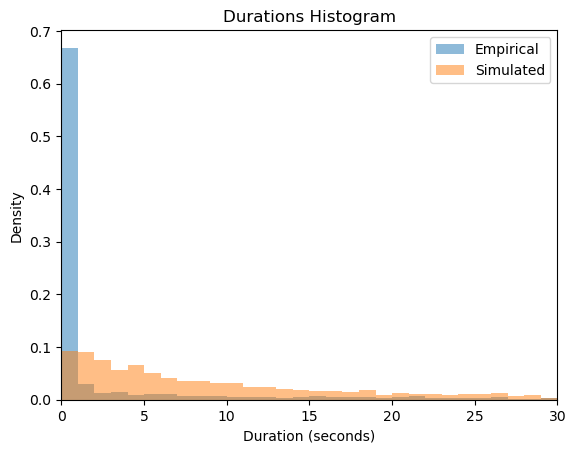

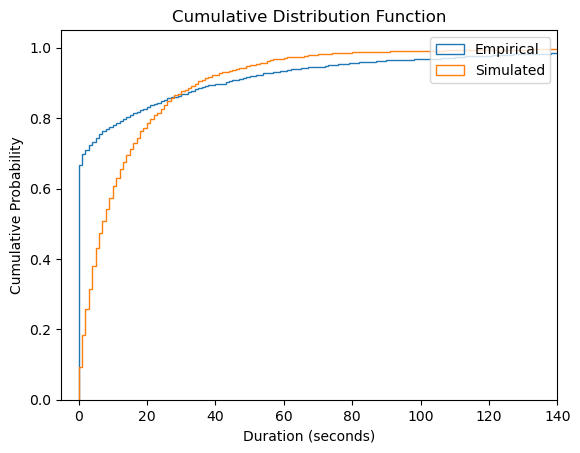

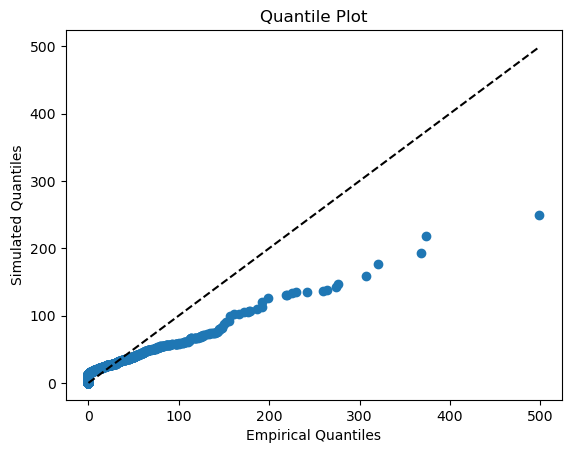

In [13]:
# Simulate the inhomogeneous Poisson process
simulated_events = inhomogeneous_poisson_process_thinning(spl, 23400)

# Compute empirical and simulated durations
empirical_durations = np.diff([0]+timestamps)
simulated_durations = np.diff([0]+simulated_events)

# Plot histograms
binwidth=1
bins=np.arange(np.min(empirical_durations), np.max(empirical_durations) + binwidth, binwidth)

plt.figure()
plt.hist(empirical_durations, bins=bins, alpha=0.5, density=True, label="Empirical")
plt.hist(simulated_durations, bins=bins, alpha=0.5, density=True, label="Simulated")
plt.xlabel("Duration (seconds)")
plt.ylabel("Density")
plt.xlim(0,30)
plt.legend()
plt.title("Durations Histogram")



# Plot cumulative distribution functions
plt.figure()
plt.hist(empirical_durations, bins=bins, cumulative=True, density=True, histtype='step', label="Empirical")
plt.hist(simulated_durations, bins=bins, cumulative=True, density=True, histtype='step', label="Simulated")
plt.xlabel("Duration (seconds)")
plt.ylabel("Cumulative Probability")
plt.xlim(-5,140)
plt.legend()
plt.title("Cumulative Distribution Function")

# Plot quantile plots
empirical_quantiles = np.quantile(empirical_durations, np.linspace(0, 1, len(empirical_durations)))
simulated_quantiles = np.quantile(simulated_durations, np.linspace(0, 1, len(empirical_durations)))

plt.figure()
plt.plot(empirical_quantiles, simulated_quantiles, 'o')
plt.plot([0, max(empirical_quantiles)], [0, max(empirical_quantiles)], 'k--')
plt.xlabel("Empirical Quantiles")
plt.ylabel("Simulated Quantiles")
plt.title("Quantile Plot")

### 2.3 Comment on the goodness-of-fit of a non-homogeneous Poisson process for trades.

- Les histogrammes ont une forme similaire mais pas avec les bons proportions, cela indique un mauvais ajustement.


- Le graphe des fonctions de distribution cumulative (CDF) Compare les fonctions de distribution cumulées empiriques et simulées des temps d'attente. Les fonctions de distribution cumulative ne superposent pas , cela indique un mauvais ajustement.


- le graphiques quantile-quantile (QQ) Compare les quantiles des temps d'attente empiriques et simulés. les points se situent très loin de la ligne à 45 degrés, cela indique un mauvais ajustement.

Conclusion : Dans ce cas des données, la modélisation avec des processus de poisson non homogène avec des intensités déterministes n'est pas un bon ajustement.